In [1]:
%matplotlib inline
import scipy.io
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from wide_resnet import WideResNet

# load model and weights
img_size = 64
model = WideResNet(img_size, depth=16, k=8)()
model.load_weights(os.path.join("pretrained_models", "weights.18-4.06.hdf5"))

# load test data
db = "wiki"
data = scipy.io.loadmat(os.path.join("data", "{}_db.mat".format(db)))
test_images = data["image"]
test_genders = data["gender"][0]
test_ages = data["age"][0]

Using TensorFlow backend.


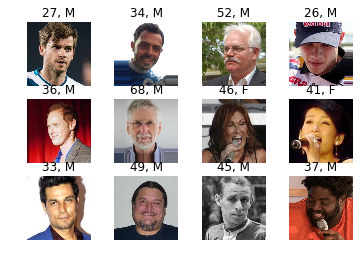

In [2]:
cols, rows = 4, 3
img_num = cols * rows
path_root = "data/{}_crop/".format(db)
img_ids = np.random.choice(len(test_ages), img_num)
sub_test_images = test_images[img_ids,:,:,:]

# predict
results = model.predict(sub_test_images)
predicted_genders = results[0]
ages = np.arange(0, 101).reshape(101, 1)
predicted_ages = results[1].dot(ages).flatten()

for i in range(img_num):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(cv2.cvtColor(sub_test_images[i,:,:,:], cv2.COLOR_BGR2RGB))
    plt.title("{}, {}".format(int(predicted_ages[i]),
                              "F" if predicted_genders[i][0]>0.5 else "M"))
    plt.axis('off')
plt.savefig("result.png")